In [79]:
# Hello World program in Python
import json
import urllib.request  # the lib that handles the url stuff
import pandas
from datetime import datetime, timedelta
import dateutil

pandas.options.display.float_format = '{:,.0f}'.format

url = "https://api.covidtracking.com/v1/us/current.json"
url = "https://api.covidtracking.com/v1/states/current.json"
url = "https://api.covidtracking.com/v1/states/daily.json"

#the_str = urllib.request.urlopen(url) 
#df = pandas.read_json(the_str)
#df.to_json("covid_save.json")
df = pandas.read_json("covid_save.json")

#print(df)


states = ["AL","CT","FL","IL","NY","VA", "NJ"]
populations = { # per https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
    "AL": 4903185,
    "CT": 3565287,
    "FL": 21477737,
    "IL": 12671821,
    "NY": 19453561,
    "VA": 8535519,
    "NJ": 9241900,
    'USA': 328200000
}
mask_usage = { # as of 10/27/2020
    "AL": .64,
    "CT": .70,
    "FL": .65,
    "IL": .67,
    "NY": .75,
    "VA": .68
}
usa_deaths = { # From https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm
    'Heart disease': 655381,
    'Cancer': 599274,
    'Accidents': 167127,
    'Influenza+Pneumonia': 60000
}
cols = ["date","state","death","positive","dataQualityGrade"]

end_date = dateutil.parser.parse("12/23/2020") #datetime.now()
start_date = end_date - timedelta(days=30)
#print(now.strftime(f"%Y%m%d")+"-"+then.strftime(f"%Y%m%d"))

#today = 20201001
#print(today)
dates = [end_date.strftime(f"%Y%m%d"),start_date.strftime(f"%Y%m%d")]
print(dates)

df2 = df[df.state.isin(states)][df.date.isin(dates)][cols]
#print(df2)

#print(df2['death'].diff(periods=(len(states)*-1)))
df2['delta_d'] = df2['death'].diff(periods=(len(states)*-1))
df2['delta_p'] = df2['positive'].diff(periods=(len(states)*-1))
df2 = df2[df.date.isin([dates[0]])]
df2['case_mortality'] = df2['delta_d'] / df2['delta_p']
df2['population'] = df2['state'].map(populations)
df2['cases/100k'] = df2['delta_p'] / df2['population'] * 100000
df2['deaths/100k'] = df2['delta_d'] / df2['population'] * 100000
df2['deaths/100k per year'] = df2['deaths/100k'] * 12
df3 = df2.copy()
df3 = df3.set_index('state')
df3 = df3.drop(labels=['date','dataQualityGrade','death','positive','population','delta_p','delta_d','deaths/100k per year'],axis=1)

#print(df2.transpose())
formatters2 = {
    'case_mortality':'{:.2%}'.format,
    'cases/100k':'{:.2f}'.format,
    'deaths/100k':'{:.2f}'.format,
    'deaths/100k per year':'{:,.2f}'.format,
    'population':lambda x : '{:,.1f}'.format(x/1000000)+'m'
    }
df2 = df2.drop(labels=['date','dataQualityGrade'],axis=1)
df2 = df2.rename(columns=
    {'death':'total deaths',
    'positive':'total positive',
    'delta_d':'death delta',
    'delta_p':'positive delta',
    })
#df2.style.format(formatters2)
for key, value in formatters2.items():
    df2[key] = df2[key].apply(formatters2[key])
#print(df2.to_string(formatters=formatters2, float_format='{:,.0f}'.format))
print(df2.transpose())

flu_mortality = 17.1 # per 100k per https://www.cdc.gov/nchs/data/nvsr/nvsr68/nvsr68_09-508.pdf (row 8 on page 6) = 0.0171% 
# If mortality is ~2% of cases, then case risk of 0.855%.




['20201223', '20201123']
                          617      623       626      632      650      653  \
state                      AL       CT        FL       IL       NJ       NY   
total deaths            4,587    5,736    21,173   16,842   18,466   29,016   
total positive        334,569  170,705 1,213,760  918,070  445,138  878,702   
death delta             1,128      865     2,863    4,730    1,694    2,626   
positive delta        100,489   63,965   283,032  253,450  135,550  276,582   
case_mortality          1.12%    1.35%     1.01%    1.87%    1.25%    0.95%   
population               4.9m     3.6m     21.5m    12.7m     9.2m    19.5m   
cases/100k            2049.46  1794.11   1317.79  2000.11  1466.69  1421.76   
deaths/100k             23.01    24.26     13.33    37.33    18.33    13.50   
deaths/100k per year   276.07   291.14    159.96   447.92   219.95   161.99   

                          665  
state                      VA  
total deaths            4,760  
total pos

In [80]:
df3

,case_mortality,cases/100k,deaths/100k
state,,,
AL,0,"2,049",23
CT,0,"1,794",24
FL,0,"1,318",13
IL,0,"2,000",37
NJ,0,"1,467",18
NY,0,"1,422",13
VA,0,"1,149",10


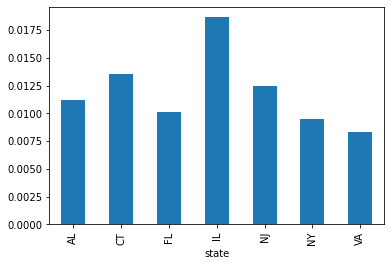

In [81]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
#plt.plot(values)
plt.figure()
df3['case_mortality'].plot(kind='bar')



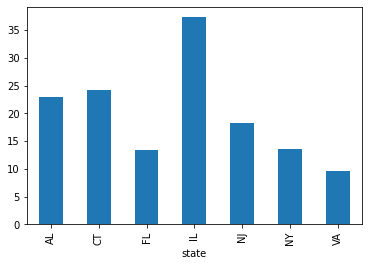

In [82]:
df3['deaths/100k'].plot(kind='bar')

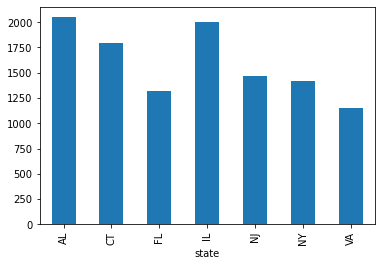

In [83]:
df3['cases/100k'].plot(kind='bar')

In [84]:
#date_time_obj = datetime.strptime("20201231", f"%Y%m%d")
#print('Date:', date_time_obj.date())
#print('Time:', date_time_obj.time())
#print('Date-time:', date_time_obj)
df['date-obj'] = pandas.to_datetime(df['date'], format=f"%Y%m%d")
df['date-obj']

0       2021-01-03
1       2021-01-03
2       2021-01-03
3       2021-01-03
4       2021-01-03
           ...    
17206   2020-01-17
17207   2020-01-16
17208   2020-01-15
17209   2020-01-14
17210   2020-01-13
Name: date-obj, Length: 17211, dtype: datetime64[ns]

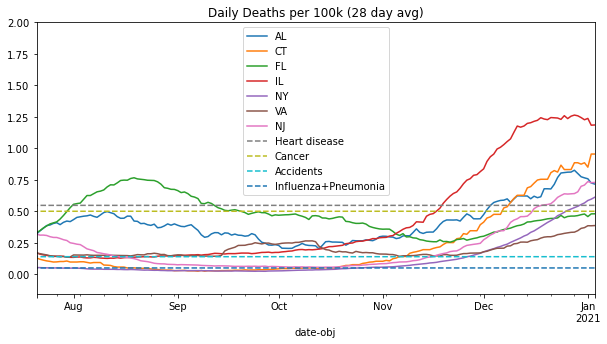

In [110]:
rolling_avg = 28
start_date = datetime.today() - timedelta(28*6)
#print(start_date)
#df_by_date = df[df['date-obj'] >= start_date]
df_by_date = df.set_index('date-obj')
df_by_date['population'] = df_by_date['state'].map(populations) / 100000
for state in states:
    #ax = df_by_date[df_by_date.state.isin([state])]['death'].diff(periods=-30).plot(y=state,legend=True) #rolling(30).mean().plot()
    ax = (df_by_date[df_by_date.state.isin([state])]['death'] / df_by_date[df_by_date.state.isin([state])]['population'] / rolling_avg)\
        .diff(periods=-1*rolling_avg).plot(y=state,legend=True) 
    ax.legend(states)    
    #df_by_date[df_by_date.state.isin(['FL'])]['death'].diff(periods=-30).plot() #rolling(30).mean().plot()
#df_by_date['Influenza'] = 0.05
#ax = df_by_date['Influenza'].plot(y=state,legend=True)
for cause in usa_deaths:
    df_by_date[cause] = usa_deaths[cause] / populations['USA'] * 100000 / 365
    ax = df_by_date[cause].plot(y=state,legend=True,style="--",figsize=(10,5),title=f"Daily Deaths per 100k ({rolling_avg} day avg)")
    ax.set_xlim(xmin=start_date)
    ax.set_ylim(ymax=2.0)

#delim = ''
#title = ''
#cause_sum = 0
#for cause in usa_deaths:
#    title += delim+cause
#    delim = '+'
#    cause_sum += usa_deaths[cause]
#df_by_date[title] = cause_sum / populations['USA'] * 100000 / 365
#print(cause_sum / populations['USA'] * 100000)
#ax = df_by_date[title].plot(y=state,legend=True)


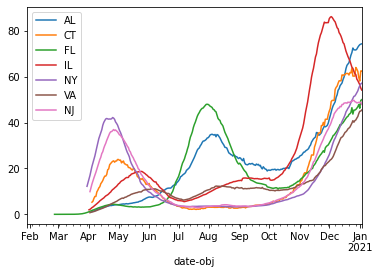

In [86]:
rolling_avg = 28
df_by_date = df.set_index('date-obj')
df_by_date['population'] = df_by_date['state'].map(populations) / 100000
for state in states:
    ax = (df_by_date[df_by_date.state.isin([state])]['positive'] / df_by_date[df_by_date.state.isin([state])]['population'] / rolling_avg)\
        .diff(periods=-28).plot(y=state,legend=True) #rolling(30).mean().plot()
    ax.legend(states)    


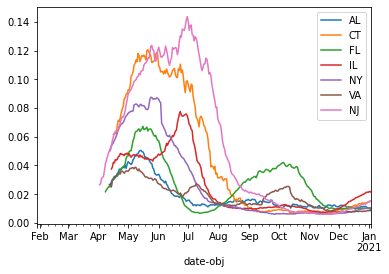

In [87]:
df_by_date = df.set_index('date-obj')
for state in states:
    ax = (df_by_date[df_by_date.state.isin([state])]['death'].diff(periods=-28) / df_by_date[df_by_date.state.isin([state])]['positive'].diff(periods=-28)).plot(y=state,legend=True) #rolling(30).mean().plot()
    ax.legend(states)    
